In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [3]:
# For imputing missing values for level_binary
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
# Libraries for predicting
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [5]:
# For imputation
from sklearn.ensemble import RandomForestClassifier
from statistics import mode

In [6]:
# Libraries for hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [7]:
# Libraries for feature selection
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, LinearSVR

In [8]:
#To save the final model
import pickle

In [15]:
#Load data
reg_data = pd.read_csv("../results/processed_data/forecasting_processed.csv")

In [16]:
reg_data.shape

(8415, 15)

In [17]:
reg_data.head()

,time_stamp,y,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level
0,2004-03-10T12:30:00Z,1185,2.6,150.0,11.9,NaN,166.0,1056.0,113.0,1692.0,NaN,13.6,48.9,0.7578,High
1,2004-03-10T13:30:00Z,1136,2.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,High
2,2004-03-10T14:30:00Z,1094,2.2,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,NaN,0.7502,NaN
3,2004-03-10T15:30:00Z,1010,2.2,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,High
4,2004-03-10T16:30:00Z,1011,1.6,51.0,6.5,836.0,131.0,1205.0,116.0,NaN,1110.0,NaN,59.6,0.7888,High


In [18]:
reg_data["level"] = reg_data["level"].map( {'Very low': -2, 'Low':-1, 'moderate':0, 'High':1, 'Very High':2 } )

In [19]:
nreg_data = reg_data.dropna(how="any")
X = nreg_data.drop(['time_stamp', 'y'], axis = 1)
y = nreg_data['y']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7)
# Train validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=7)

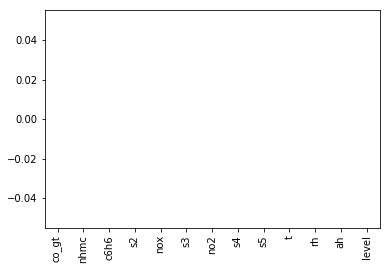

In [20]:
X.isnull().sum().plot(kind='bar')

In [21]:
X.head()

,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level
1,2.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,1.0
3,2.2,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,1.0
5,1.2,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,1.0
6,1.2,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,1.0
8,0.9,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,-1.0


In [22]:
def fit_evaluate(model): 
    '''
    Function prints the training and validation scores.
    Args
        Model: Sklearn object with predict method.
    
    Returns
        None
    '''
    model.fit(X_train, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_pred=model.predict(X_train),y_true=y_train))
    val_rmse = np.sqrt(mean_squared_error(y_pred=model.predict(X_val),y_true=y_val))
    print("Train RMSE: ", train_rmse)
    print("Validation RMSE: ", val_rmse)

## Linear Regression with L2

In [23]:
lm_ridge = Ridge()
fit_evaluate(lm_ridge)

Train RMSE:  256.790457334
Validation RMSE:  271.888130727


## Linear Regression with L1

In [24]:
lm_lasso = Lasso()
fit_evaluate(lm_lasso)

Train RMSE:  256.858638699
Validation RMSE:  271.827323779


/Users/avinash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Random Forest Regressor

In [25]:
rf_reg = RandomForestRegressor()
fit_evaluate(rf_reg)

Train RMSE:  110.812718387
Validation RMSE:  264.093454999


## K Neighbors Regressors

In [26]:
kn_reg = KNeighborsRegressor()
fit_evaluate(kn_reg)

Train RMSE:  213.507866143
Validation RMSE:  265.653100232


## Support Vector Regressor

In [27]:
sv_reg = SVR()
fit_evaluate(sv_reg)

Train RMSE:  336.693830347
Validation RMSE:  336.099480841


## GradientBoostingRegressor

In [28]:
gb_reg = GradientBoostingRegressor()
fit_evaluate(gb_reg)

Train RMSE:  209.73784904
Validation RMSE:  256.479857367


## AdaBoostRegressor

In [29]:
ab_reg = AdaBoostRegressor()
fit_evaluate(ab_reg)

Train RMSE:  286.347613504
Validation RMSE:  310.183508309


## XGBRegressor

In [30]:
xgb_reg = XGBRegressor()
fit_evaluate(xgb_reg)

Train RMSE:  213.606640448
Validation RMSE:  256.868571434


## Hyperparameter tuning for RandomForestRegressor

In [31]:
parameters = {'n_estimators': np.arange(100,300,50),
              'max_features': ['auto', 'sqrt'],
              'max_depth': [None, 5, 7, 10]}

In [32]:
rf_reg = RandomForestRegressor()
opt_gbc = GridSearchCV(rf_reg, parameters, n_jobs = -1)
opt_gbc.fit(X_train,y_train)
print(opt_gbc.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 250}


In [33]:
rf_reg_opt = RandomForestRegressor(max_depth = None, max_features = 'sqrt', n_estimators = 250)
fit_evaluate(rf_reg_opt)

Train RMSE:  94.5123056442
Validation RMSE:  252.116874184


## Hyperparameter tuning for GradientBoostingRegressor

In [34]:
parameters = {'learning_rate' : np.logspace(-2,0,num=3),
              'n_estimators': [100, 200, 250], 
              'max_depth':[3,5,7], 
              'max_features': ['auto', 'sqrt']}

In [35]:
gb_reg = GradientBoostingRegressor()
opt_gbc = GridSearchCV(gb_reg, parameters, n_jobs = -1)
opt_gbc.fit(X_train,y_train)
print(opt_gbc.best_params_)

{'learning_rate': 0.10000000000000001, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}


In [36]:
gb_reg_opt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 7,
                                       max_features = 'sqrt', n_estimators = 200)
fit_evaluate(gb_reg_opt)

Train RMSE:  66.4920727855
Validation RMSE:  253.65816563


## Feature Selection

In [37]:
def evaluate(model): 
    train_rmse = np.sqrt(mean_squared_error(y_pred=model.predict(X_train),y_true=y_train))
    val_rmse = np.sqrt(mean_squared_error(y_pred=model.predict(X_val),y_true=y_val))
    print("Train RMSE: ", train_rmse)
    print("Validation RMSE: ", val_rmse)

#### Using Extra trees regressor for feature selection

In [38]:
etr_pipeline = Pipeline([
  ('feature_selection', SelectFromModel(ExtraTreesRegressor(n_estimators=250, random_state=7))),
  ('classification', RandomForestRegressor(max_depth = None, max_features = 'sqrt', n_estimators = 250))
])
etr_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          ...imators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [39]:
evaluate(etr_pipeline)

Train RMSE:  140.938761582
Validation RMSE:  260.819301889


#### Using Lasso for feature selection

In [40]:
lasso_pipeline = Pipeline([
  ('feature_selection', SelectFromModel(Lasso())),
  ('classification', RandomForestRegressor(max_depth = None, max_features = 'sqrt', n_estimators = 250))
])

lasso_pipeline.fit(X_train, y_train)

/Users/avinash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        norm_order=1, prefit=False, threshold=None)),...imators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [41]:
evaluate(lasso_pipeline)

Train RMSE:  94.0450642082
Validation RMSE:  250.457580599


#### Using LinearSVR feature selection

In [42]:
svr_pipeline = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVR(C=0.1))),
  ('classification', RandomForestRegressor(max_depth = None, max_features = 'sqrt', n_estimators = 250))
])

svr_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
        norm_order=1, prefit=False, threshold=None)), ('classific...imators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [43]:
evaluate(svr_pipeline)

Train RMSE:  142.887876526
Validation RMSE:  269.341636016


## Test RMSE with the best model

In [44]:
test_rmse = np.sqrt(mean_squared_error(y_pred=lasso_pipeline.predict(X_test),y_true=y_test))
print("Test RMSE: ", test_rmse)

Test RMSE:  228.998407766
